In [1]:
import pandas as pd
import numpy as np

In [2]:
import FinanceDataReader as fdr

In [3]:
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams
from matplotlib import font_manager, rc
rcParams['axes.unicode_minus'] = False

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 1.주가데이터를 불러옵니다.

In [8]:
import FinanceDataReader as fdr

In [10]:
df = fdr.DataReader('005930', '2015-08-01') #삼성전자

## 2. Moving Average

* 거래일을 포함 10일까지의 데이터(10일 이동평균)를 가지고 다음날의 주가를 예측

In [11]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-08-03,23680,23680,23320,23500,196891,-0.008439
2015-08-04,23500,23740,23400,23640,256887,0.005957
2015-08-05,23640,23640,23160,23180,256050,-0.019459
2015-08-06,23100,23120,22300,22300,403981,-0.037964
2015-08-07,22400,22740,22300,22720,275742,0.018834


In [12]:
df = df[['Close']]

In [13]:
df1 = df.copy()

In [14]:
# 이동평균법
def ma(dframe, n):
    dframe['MA{}'.format(n)] = dframe.loc[:, ('Close')].rolling(window=n).mean().shift(1) # 1기 다음을 예측

In [15]:
# 단기, 5, 20, : 5, 투자심리, 20 시중금리 
# 중기 60, 90,  : 시장수급상황, 추세의 전환
# 장기 120, 240 : 경기


In [16]:
ma(df1,5)
ma(df1,60)
ma(df1,120)

In [17]:
df1 = df1.reset_index()

In [18]:
#df1 = df1.dropna()

In [19]:
df1.head(20)

,Date,Close,MA5,MA60,MA120
0,2015-08-03,23500,NaN,NaN,NaN
1,2015-08-04,23640,NaN,NaN,NaN
2,2015-08-05,23180,NaN,NaN,NaN
3,2015-08-06,22300,NaN,NaN,NaN
4,2015-08-07,22720,NaN,NaN,NaN
5,2015-08-10,22820,23068.0,NaN,NaN
6,2015-08-11,23140,22932.0,NaN,NaN
7,2015-08-12,23080,22832.0,NaN,NaN
8,2015-08-13,22800,22812.0,NaN,NaN
9,2015-08-17,22080,22912.0,NaN,NaN


In [20]:
df1 = df1.dropna()

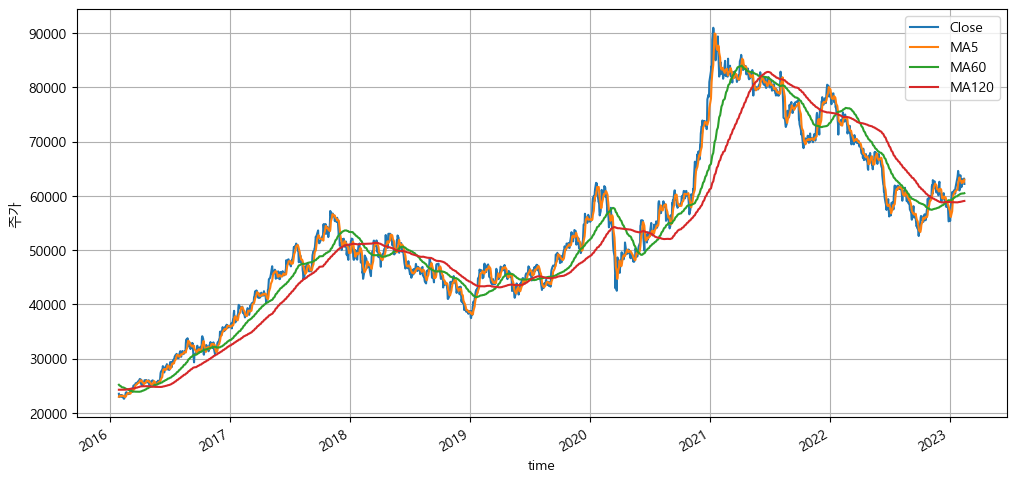

In [21]:
fig, ax = plt.subplots(nrows=1, figsize=(12, 6), sharex=True)
df1.plot(x = 'Date', y='Close', ax=ax)
df1.plot(x = 'Date', y='MA5',  ax=ax)
df1.plot(x = 'Date', y='MA60',  ax=ax)
df1.plot(x = 'Date', y='MA120',  ax=ax)
ax.set(xlabel="time", ylabel="주가")
ax.grid(True)
plt.savefig("삼성전자_MA01.png", dpi=150, bbox_inches='tight')
plt.show()